# Car Value Prediction Model

## The purpose of this project is to predict class value of a car based on the quality of features provided in the dataset

## tool used for data preprocessing: pandas

## tool used for visualization : matplotlib

## model used for prediction: Decision Tree Classifier from sklearn

## tools used for data validation: confusion_matrix, precision_score, recall_score,f1_score

In [ ]:
# Mounting Data on Google Drive

In [256]:
from google.colab import drive

In [257]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
%cd /content/drive/'My Drive'/'Colab Notebooks'
%ls

/content/drive/My Drive/Colab Notebooks
 car.data        homework01.ipynb   iris_tree.png       weather.csv
 car.dot         homework02.ipynb  'Practise 1.ipynb'   weather.ipynb
 car_model.dot   homework03.ipynb   tree.dot
 car.png         iris_tree.dot      tree.png


In [ ]:
# Loading Data

In [259]:
import pandas as pd

In [167]:
header_list = ['Buying','Maintenance','Doors','Persons','Lug_boot','Safety','Class Value']
car_df = pd.read_csv('car.data', names=header_list)

In [260]:
car_df

,Buying,Maintenance,Doors,Persons,Lug_boot,Safety,Class Value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [261]:
car_df.columns

Index(['Buying', 'Maintenance', 'Doors', 'Persons', 'Lug_boot', 'Safety',
       'Class Value'],
      dtype='object')

In [262]:
car_df_new = car_df.copy()
car_vars = ['Buying','Maintenance','Doors','Persons','Lug_boot','Safety']
car_label = car_df['Class Value']
car_df_new['Buying'] = pd.Categorical(car_df_new['Buying']).codes
car_df_new['Maintenance'] = pd.Categorical(car_df_new['Maintenance']).codes
car_df_new['Doors'] = pd.Categorical(car_df_new['Doors']).codes
car_df_new['Persons'] = pd.Categorical(car_df_new['Persons']).codes
car_df_new['Lug_boot'] = pd.Categorical(car_df_new['Lug_boot']).codes
car_df_new['Safety'] = pd.Categorical(car_df_new['Safety']).codes
car_df_new['Class Value'] = pd.Categorical(car_df_new['Class Value']).codes
car_df_new

,Buying,Maintenance,Doors,Persons,Lug_boot,Safety,Class Value
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [263]:
car_label

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: Class Value, Length: 1728, dtype: object

In [264]:
import numpy as np 
print("Car Data: " ,car_df_new[['Class Value']])
labels = car_df_new[['Class Value']].to_numpy()
labels = labels.flatten()
print("Numpy:",labels)

Car Data:        Class Value
0               2
1               2
2               2
3               2
4               2
...           ...
1723            1
1724            3
1725            2
1726            1
1727            3

[1728 rows x 1 columns]
Numpy: [2 2 2 ... 2 1 3]


In [265]:
car_classvalue = np.unique(car_label.to_numpy())
print(car_classvalue)

['acc' 'good' 'unacc' 'vgood']


In [266]:
features = car_df_new.drop(['Class Value'],axis=1)
features_np = features.to_numpy()
print(features_np)

[[3 3 0 0 2 1]
 [3 3 0 0 2 2]
 [3 3 0 0 2 0]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]


In [ ]:
# Data Visualization

In [267]:
import matplotlib.pyplot as plt


In [268]:
%matplotlib inline

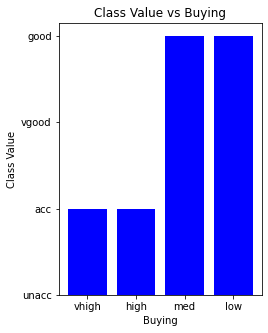

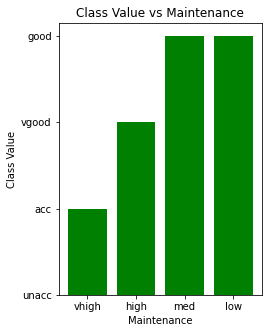

In [269]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.bar("Buying", "Class Value", data = car_df, color = "blue",)
plt.xlabel("Buying")
plt.ylabel("Class Value")
plt.title("Class Value vs Buying")
plt.show()

plt.figure(figsize=(8,5))
plt.subplot(1,2,2)
plt.bar("Maintenance", "Class Value", data = car_df, color = "green")
plt.xlabel("Maintenance")
plt.ylabel("Class Value")
plt.title("Class Value vs Maintenance")
plt.show()






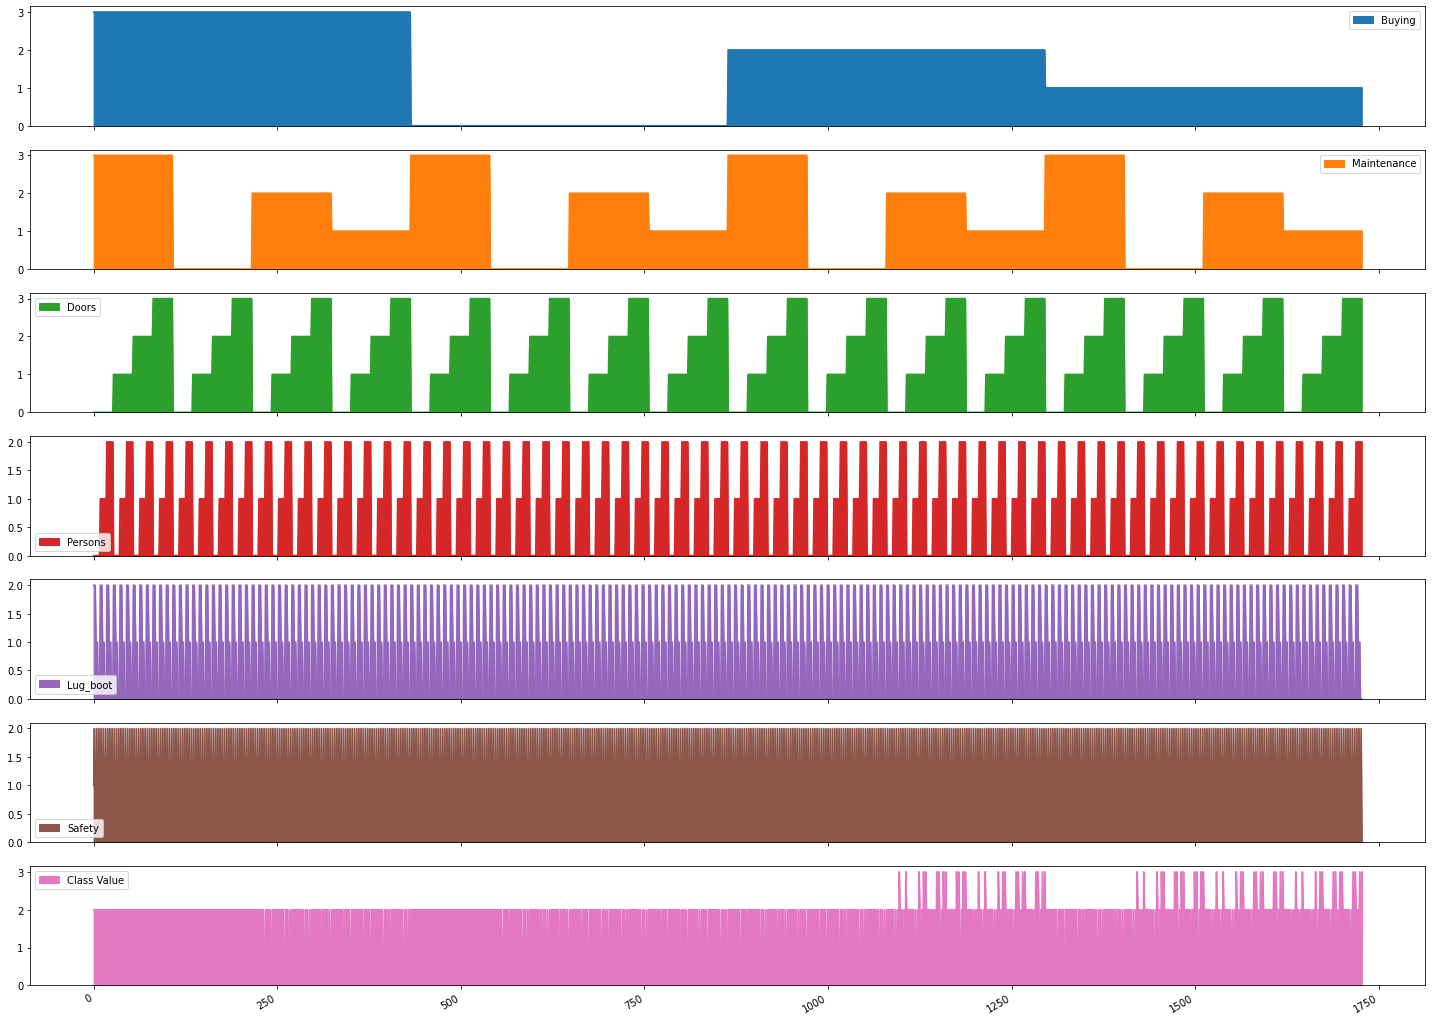

In [270]:
axs = car_df_new.plot.area(figsize=(25, 20), subplots=True)

In [271]:
x_pos = np.arange(len(car_vars))
x_pos

array([0, 1, 2, 3, 4, 5])

In [272]:
y_pos = np.arange(len(car_label))
y_pos

array([   0,    1,    2, ..., 1725, 1726, 1727])

In [ ]:
# Test/train split

In [273]:
import numpy as np
from sklearn.model_selection import train_test_split
X = features_np
#X = car_df_new[['Buying','Maintenance','Doors','Persons','Lug_boot','Safety']]
y = labels
car_train, car_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set (80%) is: ",len(car_train))
print("Test set(20%) is: ",len(car_test))

Training set (80%) is:  1382
Test set(20%) is:  346


In [ ]:
# Training a classification tree model. 

In [274]:
from sklearn.tree import DecisionTreeClassifier

In [275]:
car_model = DecisionTreeClassifier()

In [276]:
car_model.fit(car_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

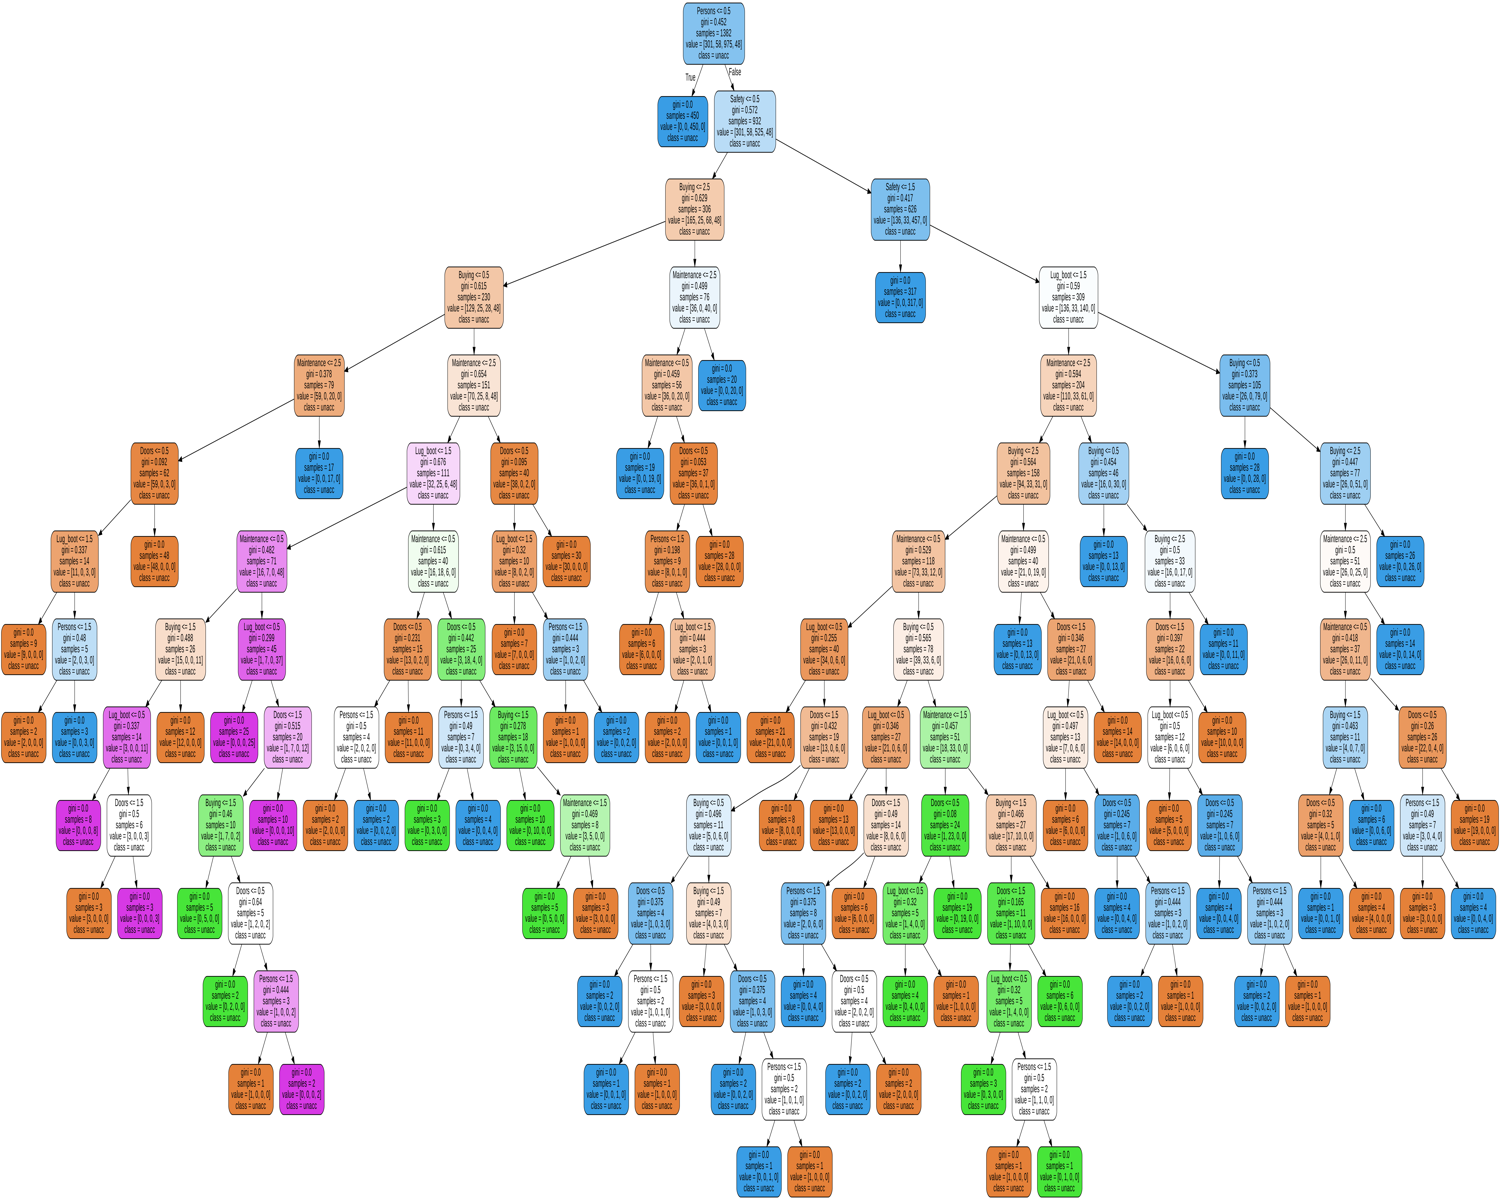

In [277]:
from sklearn.tree import export_graphviz

export_graphviz(
     car_model,

    out_file = "car.dot",

    feature_names = list(features.columns.values),

    class_names =  car_label,

    rounded = True,proportion = False,

    filled = True
)

from subprocess import call

call(['dot','-Tpng','car.dot','-o','car.png','-Gdpi=600'])


from PIL import Image
Image.MAX_IMAGE_PIXELS = None
im = Image.open('car.png')
newsize = (1500,1200)
im1 = im.resize(newsize)
im1

In [ ]:
# Making the prediction using the classification tree model. 

In [278]:
car_model.predict(car_train)

array([2, 2, 2, ..., 0, 2, 0], dtype=int8)

In [279]:
car_model.predict(car_test)

array([2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [280]:
car_model.predict_proba(car_train)

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [281]:
car_model.predict_proba(car_test)

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [ ]:
# Evaluating the classification tree model.

In [282]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



In [286]:
print("Accuracy Score for Train Set: ",metrics.accuracy_score(y_train, car_model.predict(car_train)))

Accuracy Score for Train Set:  1.0


In [287]:
print("Accuracy Score for Test Set: ",metrics.accuracy_score(y_test, car_model.predict(car_test)))

Accuracy Score for Test Set:  0.9682080924855492


In [288]:
print("Confusion Matrix for Train Set: \n", metrics.confusion_matrix(y_train,car_model.predict(car_train)))

Confusion Matrix for Train Set: 
 [[301   0   0   0]
 [  0  58   0   0]
 [  0   0 975   0]
 [  0   0   0  48]]


In [289]:
print("Confusion Matrix for Test Set: \n", metrics.confusion_matrix(y_test,car_model.predict(car_test)))

Confusion Matrix for Test Set: 
 [[ 76   6   1   0]
 [  1  10   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]


In [290]:
print("Precision Score for Train Set: \n", metrics.precision_score(y_train,car_model.predict(car_train),average=None))

Precision Score for Train Set: 
 [1. 1. 1. 1.]


In [291]:
print("Precision Score for Test Set: \n", metrics.precision_score(y_test,car_model.predict(car_test),average=None))

Precision Score for Test Set: 
 [0.97435897 0.55555556 0.99576271 1.        ]


In [293]:
print("Recall Score for Train Set: \n", metrics.recall_score(y_train,car_model.predict(car_train),average=None))

Recall Score for Train Set: 
 [1. 1. 1. 1.]


In [294]:
print("Recall Score for Test Set: \n", metrics.recall_score(y_test,car_model.predict(car_test),average=None))

Recall Score for Test Set: 
 [0.91566265 0.90909091 1.         0.82352941]


In [295]:
print("f1 Score for Train Set: \n", metrics.f1_score(y_train,car_model.predict(car_train),average=None))

f1 Score for Train Set: 
 [1. 1. 1. 1.]


In [296]:
print("f1 Score for Test Set: \n", metrics.precision_score(y_test,car_model.predict(car_test),average=None))

f1 Score for Test Set: 
 [0.97435897 0.55555556 0.99576271 1.        ]


In [297]:
print("Classification report for train set:\n")
print(classification_report(y_train,car_model.predict(car_train)))

Classification report for train set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00       975
           3       1.00      1.00      1.00        48

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382



In [298]:
print("Classification report for test set:\n")
print(classification_report(y_test,car_model.predict(car_test)))

Classification report for test set:

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.56      0.91      0.69        11
           2       1.00      1.00      1.00       235
           3       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.98      0.97      0.97       346



In [ ]:
#  Comparing models with a different splitting criterion.

In [299]:
car_train_new, car_validation, y_train_new, y_val = train_test_split(car_train, y_train, test_size=0.2, random_state=42)

In [300]:
car_model_one = DecisionTreeClassifier(criterion='gini',max_depth=20,max_features=5)

In [301]:
car_model_one.fit(car_train_new,y_train_new)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [302]:
car_model_two = DecisionTreeClassifier(criterion='entropy',max_depth=22,max_features=6)

In [303]:
car_model_two.fit(car_train_new,y_train_new)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=22, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [304]:
print("Accuracy Score for Model one validation set: ",metrics.accuracy_score(y_val, car_model_one.predict(car_validation)))

Accuracy Score for Model one validation set:  0.9638989169675091


In [305]:
from sklearn.metrics import classification_report
print("Classification report for Model one validation set:\n")
print(classification_report(y_val,car_model_one.predict(car_validation)))

Classification report for Model one validation set:

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        60
           1       0.90      0.82      0.86        11
           2       0.97      0.99      0.98       195
           3       0.92      1.00      0.96        11

    accuracy                           0.96       277
   macro avg       0.94      0.92      0.93       277
weighted avg       0.96      0.96      0.96       277



In [306]:
print("Accuracy Score for Model two validation set: ",metrics.accuracy_score(y_val, car_model_two.predict(car_validation)))

Accuracy Score for Model two validation set:  0.9747292418772563


In [307]:
print("Classification report for Model two validation set:\n")
print(classification_report(y_val,car_model_two.predict(car_validation)))

Classification report for Model two validation set:

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        60
           1       0.90      0.82      0.86        11
           2       0.98      1.00      0.99       195
           3       0.92      1.00      0.96        11

    accuracy                           0.97       277
   macro avg       0.94      0.93      0.94       277
weighted avg       0.97      0.97      0.97       277



In [308]:
print("Classification report for Model one test set:\n")
print(classification_report(y_test,car_model_one.predict(car_test)))

Classification report for Model one test set:

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        83
           1       0.53      0.91      0.67        11
           2       0.99      1.00      1.00       235
           3       0.93      0.82      0.87        17

    accuracy                           0.96       346
   macro avg       0.86      0.90      0.87       346
weighted avg       0.97      0.96      0.96       346



In [309]:
print("Accuracy Score for Model one: ",metrics.accuracy_score(y_test, car_model_one.predict(car_test)))

Accuracy Score for Model one:  0.9595375722543352


In [310]:
print("Classification report for Model two test set:\n")
print(classification_report(y_test,car_model_two.predict(car_test)))

Classification report for Model two test set:

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        83
           1       0.59      0.91      0.71        11
           2       0.98      1.00      0.99       235
           3       0.93      0.82      0.87        17

    accuracy                           0.96       346
   macro avg       0.87      0.90      0.88       346
weighted avg       0.97      0.96      0.96       346



In [311]:
print("Accuracy Score for Model two test set: ",metrics.accuracy_score(y_test, car_model_two.predict(car_test)))

Accuracy Score for Model two test set:  0.9595375722543352
